In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('/home/ritesh/Documents/Computer_Vision')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Store data,labels in the list

In [2]:
data = []
labels = []

#We have 43 classes
classes = 43
cur_path = os.getcwd()

In [3]:
cur_path

'/home/ritesh/Documents/Computer_Vision'

# Preprocess the Images

In [4]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
           # print(image)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

# Converting lists into numpy arrays

In [5]:
data = np.array(data)
labels = np.array(labels)

# Save Labels & Data for future use

In [6]:
#os.mkdir('training')

np.save('/home/ritesh/Documents/Computer_Vision/training/data',data)
np.save('/home/ritesh/Documents/Computer_Vision/training/target',labels)

# Load data & Labels

In [7]:
data=np.load('/home/ritesh/Documents/Computer_Vision/training/data.npy')
labels=np.load('/home/ritesh/Documents/Computer_Vision/training/target.npy')

In [8]:
data.shape, labels.shape

((39209, 30, 30, 3), (39209,))

# Train Test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,test_size = 0.2,random_state=0)

In [10]:
print("shape of X_train",X_train.shape)
print("shape of X_test",X_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of X_train (31367, 30, 30, 3)
shape of X_test (7842, 30, 30, 3)
shape of y_train (31367,)
shape of y_test (7842,)


# Convert labels to onehot encoding

In [11]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

# Model Building

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0

In [14]:
model.compile(loss= "categorical_crossentropy",optimizer='adam',metrics = ["accuracy"])

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint
ckpt = ModelCheckpoint(filepath = "./training/model.weights.best.hdf5",verbose=1,
                       save_best_only=True)

In [16]:
history = model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_test,y_test),callbacks=[ckpt],
                 verbose=2,shuffle=True)

Epoch 1/10
981/981 - 71s - loss: 1.6635 - accuracy: 0.5862 - val_loss: 0.2394 - val_accuracy: 0.9404

Epoch 00001: val_loss improved from inf to 0.23943, saving model to ./training/model.weights.best.hdf5
Epoch 2/10
981/981 - 94s - loss: 0.3785 - accuracy: 0.8876 - val_loss: 0.0810 - val_accuracy: 0.9809

Epoch 00002: val_loss improved from 0.23943 to 0.08105, saving model to ./training/model.weights.best.hdf5
Epoch 3/10
981/981 - 48s - loss: 0.2824 - accuracy: 0.9211 - val_loss: 0.0555 - val_accuracy: 0.9837

Epoch 00003: val_loss improved from 0.08105 to 0.05551, saving model to ./training/model.weights.best.hdf5
Epoch 4/10
981/981 - 54s - loss: 0.2146 - accuracy: 0.9416 - val_loss: 0.0490 - val_accuracy: 0.9875

Epoch 00004: val_loss improved from 0.05551 to 0.04905, saving model to ./training/model.weights.best.hdf5
Epoch 5/10
981/981 - 48s - loss: 0.2547 - accuracy: 0.9342 - val_loss: 0.0700 - val_accuracy: 0.9796

Epoch 00005: val_loss did not improve from 0.04905
Epoch 6/10
981/

# Accuracy Plot

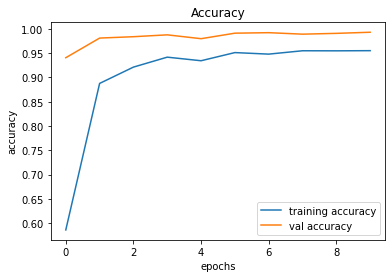

In [17]:
plt.figure(0)
plt.plot(history.history["accuracy"],label="training accuracy")
plt.plot(history.history["val_accuracy"],label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

# Loss Plot

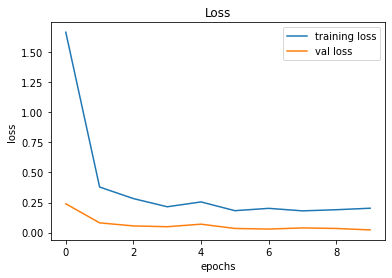

In [18]:

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Load the model with best classsification accuracy on the validation set

In [19]:
model.load_weights("model.weights.best.hdf5")

In [20]:
# evaluate test accuracy
score = model.evaluate(X_test,y_test,verbose=0)
accuracy = 100*score[1]

print("Test accuracy: %4f%%" %accuracy)

Test accuracy: 99.030858%


# Testing on Test Data

In [21]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [22]:
X_test,label = testing('/home/ritesh/Documents/Computer_Vision/Test.csv')

In [23]:
Y_pred = model.predict_classes(X_test)
Y_pred

/home/ritesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([16,  1, 38, ..., 32,  7, 10])

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9570863024544735


In [25]:
#model.save("./training/traffic.h5")

# Load the Model

In [26]:
os.chdir("/home/ritesh/Documents/Computer_Vision")
from keras.models import load_model
model = load_model('./training/traffic.h5')

In [27]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [28]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

/home/ritesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predicted traffic sign is:  Speed limit (30km/h)


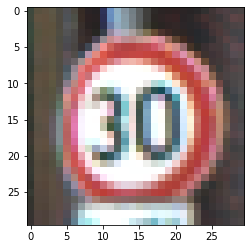

In [30]:
plot,prediction = test_on_img("/home/ritesh/Documents/Computer_Vision/Test/00001.png")
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()